In [16]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [7]:
# import the chronic diseases dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [8]:
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('format(cleveland.shape')
print (cleveland.loc[1])

format(cleveland.shape
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object


In [10]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [11]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [12]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [13]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [14]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


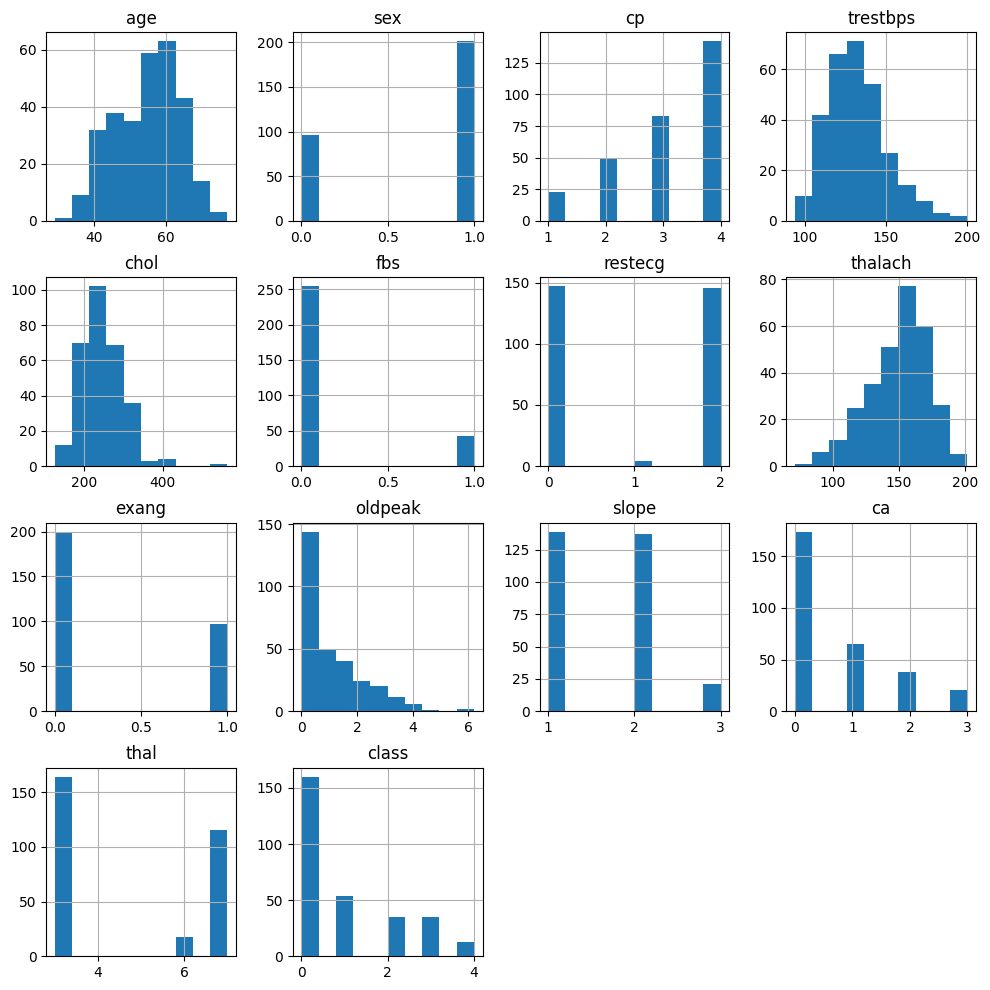

In [17]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [20]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'],axis= 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [26]:
# convert the data to categorical labels
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 112       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [40]:
# fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test) ,epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8966 - accuracy: 0.6329 - val_loss: 0.9081 - val_accuracy: 0.6833
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.6456 - val_loss: 0.8980 - val_accuracy: 0.6667
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.6414 - val_loss: 0.8838 - val_accuracy: 0.6167
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9011 - accuracy: 0.6329 - val_loss: 0.9215 - val_accuracy: 0.6833
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.6414 - val_loss: 0.8998 - val_accuracy: 0.6333
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9151 - accuracy: 0.6287 - val_loss: 0.9678 - val_accuracy: 0.6833
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8843 - accuracy: 0.6414 - val_loss: 0.8847 - val_accuracy: 0.6167
Epoch 8/100
2

Epoch 59/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.6329 - val_loss: 0.9439 - val_accuracy: 0.6667
Epoch 60/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8870 - accuracy: 0.6245 - val_loss: 0.9128 - val_accuracy: 0.6333
Epoch 61/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8959 - accuracy: 0.6245 - val_loss: 0.9514 - val_accuracy: 0.6667
Epoch 62/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8871 - accuracy: 0.6456 - val_loss: 0.8798 - val_accuracy: 0.6000
Epoch 63/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9037 - accuracy: 0.6287 - val_loss: 0.8714 - val_accuracy: 0.6000
Epoch 64/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9076 - accuracy: 0.6203 - val_loss: 1.0189 - val_accuracy: 0.6833
Epoch 65/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.5949 - val_loss: 0.9279 - val_accuracy: 0.6333
Epoch 

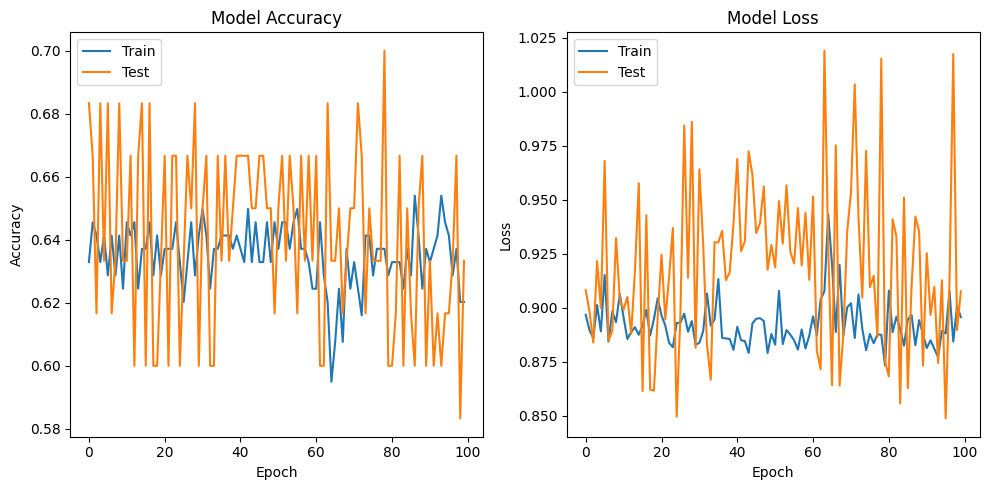

In [41]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [42]:
# convert into binary classification problem - disease or no disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0]


In [44]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 112       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [48]:
# fit the binary model on the training data
binary_hist=binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 695us/step - loss: 0.4209 - accuracy: 0.8186
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8312
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8312
Epoch 4/100
24/24 [==============================] - 0s 701us/step - loss: 0.4277 - accuracy: 0.8312
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8059
Epoch 6/100
24/24 [==============================] - 0s 611us/step - loss: 0.4217 - accuracy: 0.8354
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8312
Epoch 8/100
24/24 [==============================] - 0s 722us/step - loss: 0.4303 - accuracy: 0.8143
Epoch 9/100
24/24 [==============================] - 0s 802us/step - loss: 0.4156 - accuracy: 0.8312
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8270

24/24 [==============================] - 0s 756us/step - loss: 0.4050 - accuracy: 0.8354
Epoch 83/100
24/24 [==============================] - 0s 914us/step - loss: 0.4073 - accuracy: 0.8354
Epoch 84/100
24/24 [==============================] - 0s 553us/step - loss: 0.4165 - accuracy: 0.8312
Epoch 85/100
24/24 [==============================] - 0s 788us/step - loss: 0.4134 - accuracy: 0.8186
Epoch 86/100
24/24 [==============================] - 0s 725us/step - loss: 0.4182 - accuracy: 0.8143
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8228
Epoch 88/100
24/24 [==============================] - 0s 556us/step - loss: 0.4056 - accuracy: 0.8439
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8481
Epoch 90/100
24/24 [==============================] - 0s 726us/step - loss: 0.4244 - accuracy: 0.8228
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8439

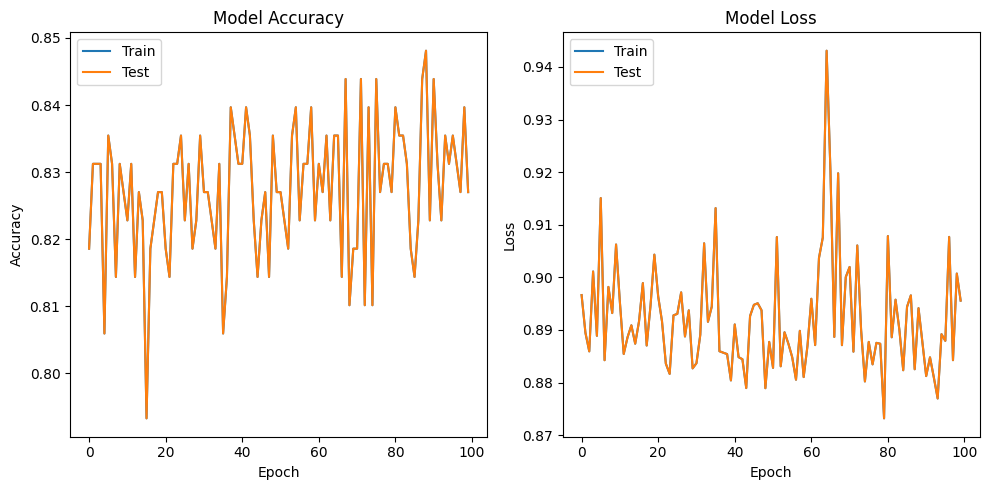

In [50]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(binary_hist.history['accuracy'])
plt.plot(binary_hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [51]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 0s/step
Results for Categorical Model
0.6333333333333333
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       1.00      0.10      0.18        10
           2       0.26      0.62      0.37         8
           3       0.33      0.27      0.30        11
           4       0.00      0.00      0.00         1

    accuracy                           0.63        60
   macro avg       0.51      0.39      0.36        60
weighted avg       0.73      0.63      0.61        60



C:\Users\youss\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youss\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youss\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 1ms/step
Results for Binary Model
0.9666666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

